In [29]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import sys
import os
import json
import torch
import yaml
import numpy as np
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
from segment_anything import SamPredictor, sam_model_registry

In [31]:
DATA_PATH = "/workspace/plane-nerf/data/jackal_floor_training_data_1"
MODEL_CHOICE = "default"
DEVICE = "cuda:0"
SAM_CHECKPOINT = "/stored_data/sam_vit_h_4b8939.pth"
sam = sam_model_registry[MODEL_CHOICE](checkpoint=SAM_CHECKPOINT)
sam.to(device=DEVICE)
sam = SamPredictor(sam)

#Open bounding box csv file
bounding_box = np.genfromtxt(DATA_PATH + "/bounding_box.csv", delimiter=',', dtype=None, encoding=None)

if not os.path.exists(DATA_PATH + "/images"):
    os.makedirs(DATA_PATH + "/images")
if not os.path.exists(DATA_PATH + "/masks"):
    os.makedirs(DATA_PATH + "/masks")

#Open transform file
with open(os.path.join(DATA_PATH, 'transforms.json'), 'r') as f:
    transform = json.load(f)

In [34]:
new_frames = []

for i in range(len(transform["frames"])):
    img_path = os.path.join(DATA_PATH, transform["frames"][i]["file_path"])

    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    box = bounding_box[i]

    sam.set_image(image)

    masks, _, _ = sam.predict(box=box)

    #Save mask
    mask = masks[-1]
    mask = mask.astype(np.uint8)
    mask = mask * 255
    mask = Image.fromarray(mask)
    mask_path = os.path.join(DATA_PATH, transform["frames"][i]["mask_path"])
    
    #Save mask to file
    mask.save(mask_path)


transform["frames"] = new_frames

/workspace/plane-nerf/data/jackal_floor_training_data_1/images/0.png
/workspace/plane-nerf/data/jackal_floor_training_data_1/masks/0.png
/workspace/plane-nerf/data/jackal_floor_training_data_1/images/1.png
/workspace/plane-nerf/data/jackal_floor_training_data_1/masks/1.png
/workspace/plane-nerf/data/jackal_floor_training_data_1/images/2.png
/workspace/plane-nerf/data/jackal_floor_training_data_1/masks/2.png
/workspace/plane-nerf/data/jackal_floor_training_data_1/images/3.png
/workspace/plane-nerf/data/jackal_floor_training_data_1/masks/3.png
/workspace/plane-nerf/data/jackal_floor_training_data_1/images/4.png
/workspace/plane-nerf/data/jackal_floor_training_data_1/masks/4.png
/workspace/plane-nerf/data/jackal_floor_training_data_1/images/5.png
/workspace/plane-nerf/data/jackal_floor_training_data_1/masks/5.png
/workspace/plane-nerf/data/jackal_floor_training_data_1/images/6.png
/workspace/plane-nerf/data/jackal_floor_training_data_1/masks/6.png
/workspace/plane-nerf/data/jackal_floor_t

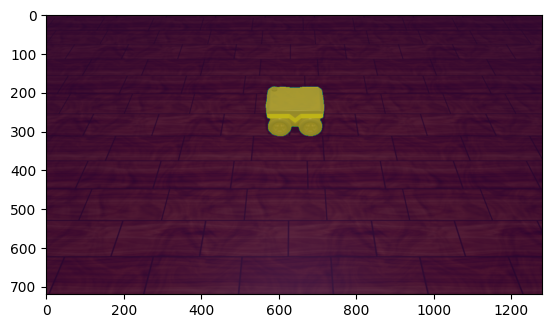

In [ ]:
#Show mask over image
plt.imshow(image)
plt.imshow(masks[-1], alpha=0.5)
plt.show()

In [ ]:
print(transform)